# PROJECT INTRODUCTION: LAPTOP DATA ANALYSIS

#### * This project focuses on performing an in-depth analysis of a dataset containing specifications and pricing information for a wide range of laptops. The dataset includes key attributes such as brand, screen size, processor, memory, graphics, weight, and price.

#### * The objective of this analysis is to extract meaningful insights that can benefit both consumers and manufacturers by understanding how various features influence laptop pricing and market positioning.

# Four Major Parts:

### 1. Data understanding
### 2. Data cleaning 
### 3. Data Analysis 
### 4. Recommendations 

# DATA UNDERSTANDING

## IMPORT LIBRARIES:

In [934]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [936]:
warnings.filterwarnings("ignore")

In [937]:
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)

### LOAD DATASET

In [939]:
df = pd.read_csv("D:\DA & DS\Reinforcement Test\Python\Laptop Dataset\laptopData.csv")

In [940]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [941]:
df.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300.0,Lenovo,Notebook,65.4,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302.0,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [942]:
df.shape

(1303, 12)

In [943]:
df.describe()

,Unnamed: 0,Price
count,1273.000000,1273.000000
mean,652.674784,59955.814073
std,376.493027,37332.251005
min,0.000000,9270.720000
25%,327.000000,31914.720000
50%,652.000000,52161.120000
75%,980.000000,79333.387200
max,1302.000000,324954.720000


In [944]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1253 non-null   object 
 3   Inches            1220 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1259 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1259 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [945]:
df.isnull().sum()

Unnamed: 0          30
Company             30
TypeName            50
Inches              83
ScreenResolution    30
Cpu                 30
Ram                 44
Memory              30
Gpu                 30
OpSys               30
Weight              44
Price               30
dtype: int64

In [946]:
#to find the how much percentage of null in every columns
round(df.isnull().sum()/len(df.index)*100,2)

Unnamed: 0          2.30
Company             2.30
TypeName            3.84
Inches              6.37
ScreenResolution    2.30
Cpu                 2.30
Ram                 3.38
Memory              2.30
Gpu                 2.30
OpSys               2.30
Weight              3.38
Price               2.30
dtype: float64

# DATA CLEANING

In [948]:
#no.of duplicates
df.duplicated().sum()

29

In [949]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#display only null value row/columns
df[df.isnull().any(axis=1)]

In [951]:
#drop rows which every cell/column has a null
df.dropna(how = "all",inplace=True)

In [966]:
round(df.isnull().sum()/len(df.index)*100,2)

Unnamed: 0          0.00
Company             0.00
TypeName            1.57
Inches              4.16
ScreenResolution    0.00
Cpu                 0.00
Ram                 1.10
Memory              0.00
Gpu                 0.00
OpSys               0.00
Weight              1.10
Price               0.00
dtype: float64

In [967]:
#dropped the Unnamed: 0 column
df.drop(["Unnamed: 0"],axis=1,inplace = True)

In [968]:
df["Company"].value_counts()

Company
Lenovo       290
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: count, dtype: int64

In [969]:
#fill null values with unknown
df["TypeName"].fillna("unknown",inplace=True)

In [970]:
df["TypeName"].value_counts()

TypeName
Notebook              693
Gaming                202
Ultrabook             191
2 in 1 Convertible    114
Workstation            29
Netbook                24
unknown                20
Name: count, dtype: int64

In [971]:
#rerplace "Netbook" as "Notebook"
df["TypeName"] = df["TypeName"].replace("Netbook","Notebook")

In [972]:
df["TypeName"].value_counts()

TypeName
Notebook              717
Gaming                202
Ultrabook             191
2 in 1 Convertible    114
Workstation            29
unknown                20
Name: count, dtype: int64

In [973]:
df["Inches"].value_counts()

Inches
15.6     615
14       184
13.3     155
17.3     148
12.5      31
11.6      31
12         6
13.9       6
12.3       5
13.5       5
15.4       4
15         4
35.6       3
10.1       2
24         2
13         2
27.3       1
25.6       1
89.2       1
111.8      1
2.1        1
8.4        1
75.7       1
21.8       1
88.1       1
11.3       1
14.1       1
18.4       1
17         1
31.6       1
?          1
33.5       1
65.4       1
Name: count, dtype: int64

In [974]:
#repplace "?" with 0
df["Inches"].replace("?","0",inplace=True)

In [975]:
#fill null values with 0
df["Inches"] = df["Inches"].fillna(0)

In [976]:
#convert Inches as float datatype
df["Inches"] = df["Inches"].astype(float)

In [977]:
#find mean for inches between 13-17.3
inch_filter_df = df[(df["Inches"] > 13) & (df["Inches"] < 17.3)]
print(inch_filter_df["Inches"].mean())
avg_inch = round(inch_filter_df["Inches"].mean(),2)

14.90779487179487


In [978]:
#changed the find mean values with unreal values
df["Inches"] = df["Inches"].where((df["Inches"] > 13) & (df["Inches"] < 17.3), avg_inch)

In [979]:
df["Inches"].value_counts()

Inches
15.60    615
14.91    298
14.00    184
13.30    155
13.90      6
13.50      5
15.40      4
15.00      4
17.00      1
14.10      1
Name: count, dtype: int64

In [980]:
df["Weight"].value_counts()

Weight
2.2kg        109
2.1kg         55
2.4kg         42
2.3kg         40
2.5kg         37
2kg           32
2.8kg         27
1.2kg         25
1.4kg         23
2.18kg        22
2.04kg        22
1.86kg        22
1.6kg         20
1.5kg         19
1.95kg        18
1.9kg         18
1.3kg         17
1.8kg         17
1.7kg         17
1.91kg        14
1.36kg        13
1.26kg        13
3kg           13
1.37kg        13
2.7kg         12
1.1kg         12
2.62kg        12
1.25kg        12
2.6kg         12
1.29kg        11
4.42kg        11
1.63kg        11
1.49kg        10
1.48kg        10
2.0kg         10
2.23kg         9
2.65kg         9
1.84kg         9
1.64kg         9
2.9kg          8
2.36kg         8
1.54kg         8
2.31kg         8
2.06kg         8
1.65kg         7
1.44kg         7
1.05kg         7
1.45kg         7
1.23kg         7
3.2kg          7
2.02kg         7
1.32kg         7
1.75kg         6
1.43kg         6
2.25kg         6
1.42kg         6
2.19kg         6
1.28kg         6
1.62kg 

In [981]:
#can't able to convert datatype to float due to "?" and that has been found by query
df.query("Weight == '?'")

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
208,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,?,77202.72


In [982]:
#replaced that "?" into 0
df["Weight"].replace("?",0,inplace = True)

In [983]:
#converted that datatype to string and then cutted-off "kg"
df["Weight"] = df["Weight"].str.replace("kg","")

In [984]:
df["Weight"] = df["Weight"].str.replace("Kg","")

In [985]:
#converted datatype string to float after removal of "kg".Due to find the mean value and change the unreal data
df["Weight"] = df["Weight"].astype(float)

In [1006]:
df["Weight"].value_counts()

Weight
2.20000     114
2.10000      55
2.00000      42
2.40000      42
2.30000      40
2.50000      37
2.80000      27
1.20000      25
1.40000      23
2.18000      22
1.86000      22
2.04000      22
1.90000      21
1.60000      20
1.50000      19
1.95000      18
1.70000      18
1.80000      17
1.30000      17
3.00000      15
1.91000      14
1.36000      13
1.26000      13
1.37000      13
1.10000      13
2.62000      12
1.25000      12
2.60000      12
2.70000      12
4.42000      11
1.63000      11
1.29000      11
1.48000      10
1.49000      10
2.65000       9
1.64000       9
1.84000       9
2.23000       9
2.90000       8
2.06000       8
2.31000       8
1.54000       8
2.36000       8
1.23000       7
1.05000       7
1.32000       7
2.02000       7
1.65000       7
3.20000       7
1.45000       7
1.44000       7
1.28000       6
0.92000       6
1.34000       6
1.62000       6
2.25000       6
1.43000       6
1.75000       6
2.19000       6
1.42000       6
1.88000       6
2.32000       5
1

In [1007]:
#find the mean value for weight between 1-4.5
weight_filter_df = df[(df["Weight"] > 1) & (df["Weight"] < 4.5)]
print(weight_filter_df["Weight"].mean())
avg_weight = round(weight_filter_df["Weight"].mean(),2)

2.048433141919606


In [1008]:
#changed the find mean values with unreal values
df["Weight"] = df["Weight"].where((df["Weight"] > 1) & (df["Weight"] < 4.5), avg_weight)

In [1009]:
#rounded the float with .1 to undedrstand better
df["Weight"] = round(df["Weight"],1)

In [1010]:
df["Weight"].value_counts()

Weight
2.2    170
2.0    160
1.4     85
2.1     77
1.9     74
1.2     72
1.3     67
2.4     61
1.6     60
2.3     60
1.5     52
2.6     46
1.8     44
2.5     38
2.8     33
1.1     26
1.7     25
2.7     24
4.4     16
3.0     16
3.2     11
2.9     10
1.0      7
3.8      6
3.4      5
4.3      5
3.3      4
3.5      4
4.2      3
3.6      3
3.1      3
4.1      3
4.0      2
3.7      1
Name: count, dtype: int64

In [1011]:
#converted value into float
df["Weight"] = df["Weight"].astype(float)

In [1012]:
df["Weight"]

0       1.4
1       1.3
2       1.9
3       1.8
4       1.4
5       2.1
6       2.0
7       1.3
8       1.3
9       1.6
10      1.9
11      1.9
12      1.8
13      2.2
14      2.0
15      1.4
16      2.2
17      1.8
18      2.0
19      1.2
21      2.5
22      1.9
23      1.6
24      1.9
25      2.3
26      1.4
27      2.2
28      1.9
29      2.5
30      1.9
31      1.6
32      2.7
33      1.2
34      1.4
35      1.4
36      2.1
37      2.8
38      1.9
39      2.1
40      2.0
41      2.6
42      2.3
43      2.2
44      2.8
45      1.4
47      3.2
48      2.3
49      2.8
51      2.2
52      1.9
53      1.5
54      2.4
55      2.1
56      1.9
57      2.0
58      2.4
59      2.0
60      2.8
61      1.7
62      1.7
63      1.4
64      1.9
65      1.8
66      1.9
67      2.0
68      1.9
69      3.0
70      1.3
71      1.4
72      2.2
73      2.7
74      2.1
75      2.2
76      2.2
77      2.0
78      2.2
79      2.5
80      1.9
81      2.0
82      1.6
83      2.2
84      2.1
85      2.6
86  

In [1013]:
#string datatype so mode has beed found
ram_mode = df["Ram"].mode()

In [1014]:
ram_mode

0    8GB
Name: Ram, dtype: object

In [1015]:
#filled the null value with mode of RAM
df["Ram"] = df["Ram"].fillna(ram_mode[0])

In [1016]:
#string datatype so mode has beed found
memory_mode = df["Memory"].mode()

In [1017]:
memory_mode

0    256GB SSD
Name: Memory, dtype: object

In [1018]:
#"?" has been found which is the only one has no value, so using replace it changed with the mode value
df["Memory"] = df["Memory"].replace("?",memory_mode[0])

In [1019]:
df["Memory"].value_counts()

Memory
256GB SSD                        402
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
128GB Flash Storage                4
180GB SSD                          4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [1020]:
df["OpSys"].value_counts()

OpSys
Windows 10      1047
No OS             63
Linux             61
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

In [1021]:
#In the OpSys column, the value "NO OS" is not relevant, so I decided to replace it with the most frequent value (mode). 
#Before doing that, I filtered for Apple segment laptops and confirmed that "NO OS" does not appear in that segment. 
#Since the company sells both Apple and Windows laptops, and "NO OS" appears only in non-Apple entries, I replaced "NO OS" with "Windows 10".


df["OpSys"].replace("No OS","Windows 10",inplace=True)

In [1022]:
df["OpSys"].value_counts()

OpSys
Windows 10      1110
Linux             61
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

In [1023]:
#Converted the Price column to integer type for better readability and cleaner value presentation
df["Price"] = df["Price"].astype(int)

In [1024]:
df.columns.to_list()

['Company',
 'TypeName',
 'Inches',
 'ScreenResolution',
 'Cpu',
 'Ram',
 'Memory',
 'Gpu',
 'OpSys',
 'Weight',
 'Price']

In [1025]:
#renamed the column name
df.rename(columns = {'Company' : "Company",
 'TypeName' : "Type_Name",
 'Inches' : "Screen_Size(Inch)",
 'ScreenResolution' : "Screen_Resolution",
 'Cpu' : "Processor",
 'Ram' : "RAM",
 'Memory' : "Memory",
 'Gpu' : "GPU",
 'OpSys' : "OpSys",
 'Weight' : "Weight(Kg)",
 'Price' : "Price"},inplace=True)

In [1046]:
df.isnull().sum()

Company              0
Type_Name            0
Screen_Size(Inch)    0
Screen_Resolution    0
Processor            0
RAM                  0
Memory               0
GPU                  0
OpSys                0
Weight(Kg)           0
Price                0
dtype: int64

In [1047]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1273 non-null   object 
 1   Type_Name          1273 non-null   object 
 2   Screen_Size(Inch)  1273 non-null   float64
 3   Screen_Resolution  1273 non-null   object 
 4   Processor          1273 non-null   object 
 5   RAM                1273 non-null   object 
 6   Memory             1273 non-null   object 
 7   GPU                1273 non-null   object 
 8   OpSys              1273 non-null   object 
 9   Weight(Kg)         1273 non-null   float64
 10  Price              1273 non-null   int32  
dtypes: float64(2), int32(1), object(8)
memory usage: 114.4+ KB


In [1048]:
df.head()

,Company,Type_Name,Screen_Size(Inch),Screen_Resolution,Processor,RAM,Memory,GPU,OpSys,Weight(Kg),Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.4,71378
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.3,47895
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.9,30636
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.8,135195
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.4,96095


In [1049]:
#created the funcction for setting the new column for segment laptops
def category_preference(Price):
    if Price <=45000:
        return "Entry-Level"
    elif Price <=75000:
        return "Mainstream / Mid-Range"
    else:
        return "Premium / High-End"

df["Preference"] = df["Price"].apply(category_preference)

In [1050]:
df["OpSys"].value_counts()

OpSys
Windows 10      1110
Linux             61
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

In [1051]:
df["RAM(GB)"] = df["RAM"].str.replace("GB", "").astype(int)

In [1052]:
#created function for categories the apple & window laptops
def laptop_brand(OpSys):
    if "macOS" in OpSys or "Mac OS X" in OpSys:
        return "Mac"
    elif "Windows" in OpSys:
        return "Windows"
    elif "Linux" in OpSys:
        return "Linux"
    elif "Chrome" in OpSys:
        return "Chrome OS"
    elif "Android" in OpSys:
        return "Android"
    else:
        return "Other"

df["OS_Type"] = df["OpSys"].apply(laptop_brand)

In [1053]:
#created function for CPU standarsize
def cpu_standardize(Processor):
    if "Intel" in Processor:
        return "Intel"
    elif "AMD" in Processor:
        return "AMD"
    else:
        return "Others"

df["Processor_Type"] = df["Processor"].apply(cpu_standardize)

In [1054]:
#created function for GPU standardize
def gpu_standardize(GPU):
    if 'Intel' in GPU:
        return 'Integrated'
    elif 'Vega' in GPU and 'AMD' in GPU:
        return 'Integrated'  # AMD Vega integrated graphics
    else:
        return 'Dedicated'

df['GPU_Type'] = df['GPU'].apply(gpu_standardize)

In [1055]:
def weight_category(Weight):
    if Weight <= 2.0:
        return "Light"
    elif Weight <= 3.5:
        return "Moderate"
    else:
        return "Heavy"

df["Weight_Category"] = df["Weight(Kg)"].apply(weight_category)

In [1056]:
df

,Company,Type_Name,Screen_Size(Inch),Screen_Resolution,Processor,RAM,Memory,GPU,OpSys,Weight(Kg),Price,Preference,RAM(GB),OS_Type,Processor_Type,GPU_Type,Weight_Category
0,Apple,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.4,71378,Mainstream / Mid-Range,8,Mac,Intel,Integrated,Light
1,Apple,Ultrabook,13.30,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.3,47895,Mainstream / Mid-Range,8,Mac,Intel,Integrated,Light
2,HP,Notebook,15.60,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.9,30636,Entry-Level,8,Windows,Intel,Integrated,Light
3,Apple,Ultrabook,15.40,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.8,135195,Premium / High-End,16,Mac,Intel,Dedicated,Light
4,Apple,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.4,96095,Premium / High-End,8,Mac,Intel,Integrated,Light
5,Acer,Notebook,15.60,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1,21312,Entry-Level,4,Windows,AMD,Dedicated,Moderate
6,Apple,Ultrabook,15.40,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.0,114017,Premium / High-End,16,Mac,Intel,Integrated,Light
7,Apple,Ultrabook,13.30,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.3,61735,Mainstream / Mid-Range,8,Mac,Intel,Integrated,Light
8,Asus,Ultrabook,14.00,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3,79653,Premium / High-End,16,Windows,Intel,Dedicated,Light
9,Acer,Ultrabook,14.00,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6,41025,Entry-Level,8,Windows,Intel,Integrated,Light


# EXPLORATORY DATA ANALYSIS (EDA)

In [1058]:
df.describe()

,Screen_Size(Inch),Weight(Kg),Price,RAM(GB)
count,1273.000000,1273.000000,1273.000000,1273.000000
mean,14.908311,2.045640,59955.311076,8.476826
std,0.826555,0.625354,37332.247865,5.556143
min,13.300000,1.000000,9270.000000,1.000000
25%,14.000000,1.600000,31914.000000,4.000000
50%,14.910000,2.000000,52161.000000,8.000000
75%,15.600000,2.300000,79333.000000,8.000000
max,17.000000,4.400000,324954.000000,64.000000


In [1059]:
df.describe(include='object')

,Company,Type_Name,Screen_Resolution,Processor,RAM,Memory,GPU,OpSys,Preference,OS_Type,Processor_Type,GPU_Type,Weight_Category
count,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273
unique,19,6,40,118,10,39,110,8,3,5,3,2,3
top,Lenovo,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,Entry-Level,Windows,Intel,Integrated,Light
freq,290,717,495,183,608,402,271,1110,532,1163,1210,703,672


## UNIVARIATE ANALYSIS

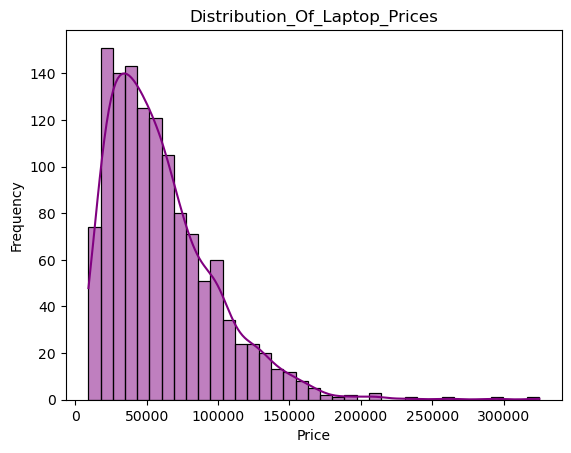

In [1061]:
sns.histplot(df["Price"],color="purple",kde=True)
plt.title("Distribution_Of_Laptop_Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [1062]:
df["Price"].quantile(.99)

167852.75999999998

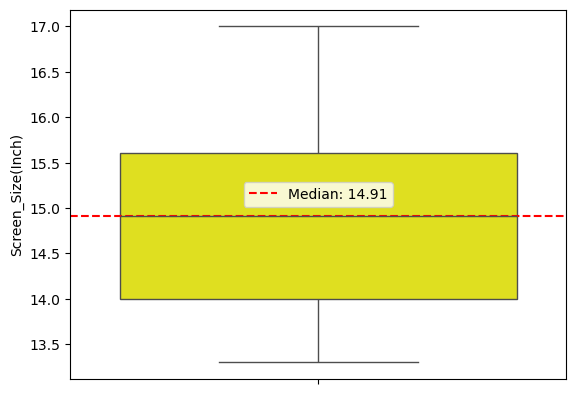

In [1063]:
med_val = df["Screen_Size(Inch)"].median()
sns.boxplot(df["Screen_Size(Inch)"],color="yellow")
plt.axhline(med_val, color='red', linestyle='--', label=f"Median: {med_val:}")
plt.legend()
plt.show()

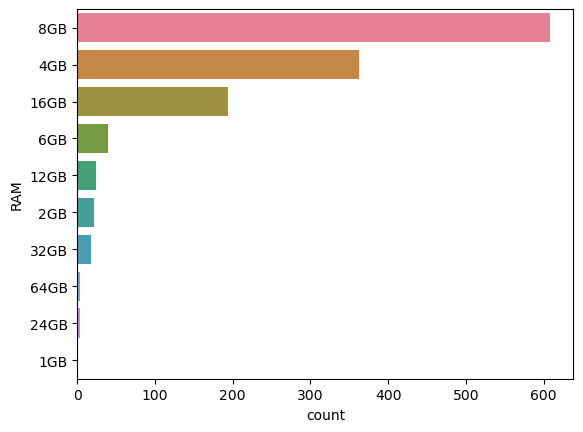

In [1064]:
sns.countplot(df["RAM"],order=df["RAM"].value_counts(ascending=False).index,palette="husl")
plt.show()

## BIVARIATE ANALYSIS

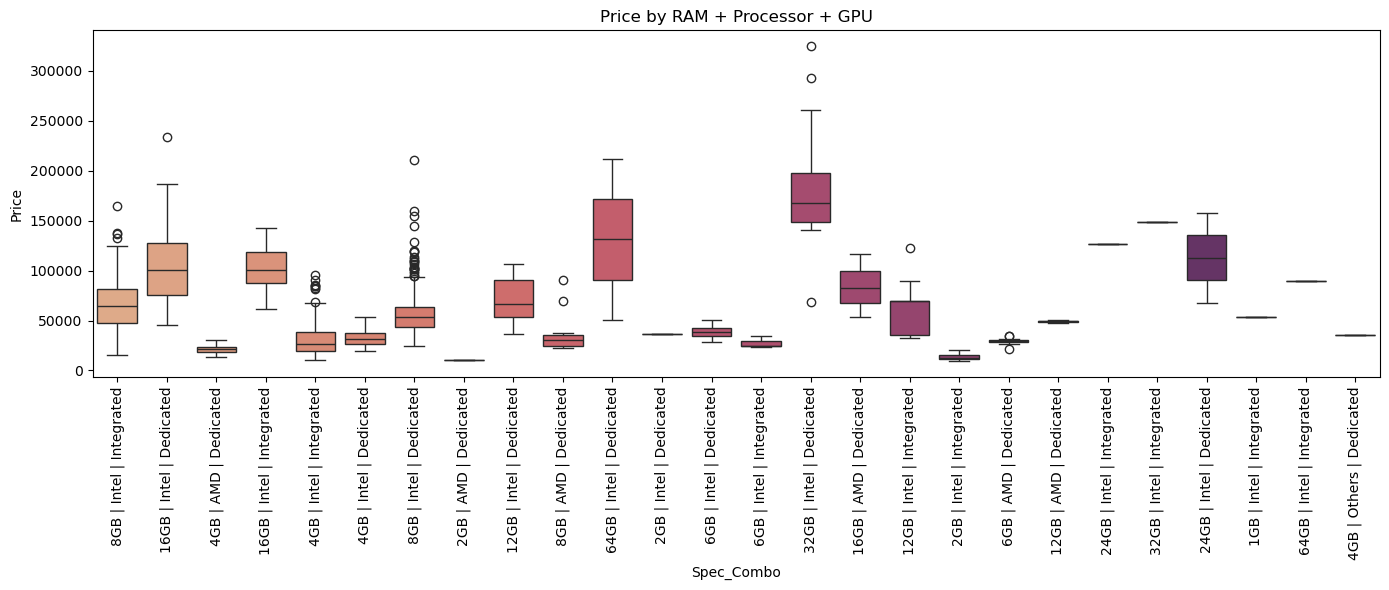

In [1066]:
df["Spec_Combo"] = df["RAM"] + " | " + df["Processor_Type"] + " | " + df["GPU_Type"]

plt.figure(figsize=(14, 6))
sns.boxplot(x="Spec_Combo", y="Price",palette="flare",data=df)
plt.xticks(rotation=90)
plt.title("Price by RAM + Processor + GPU")
plt.tight_layout()
plt.show()

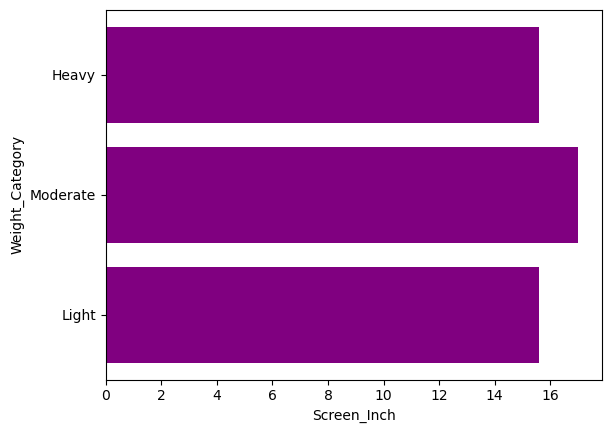

In [1067]:
plt.barh(width = "Screen_Size(Inch)", y ="Weight_Category",color="purple",data=df)
plt.xlabel("Screen_Inch")
plt.ylabel("Weight_Category")
plt.show()

## MULTIVARIATE ANALYSIS

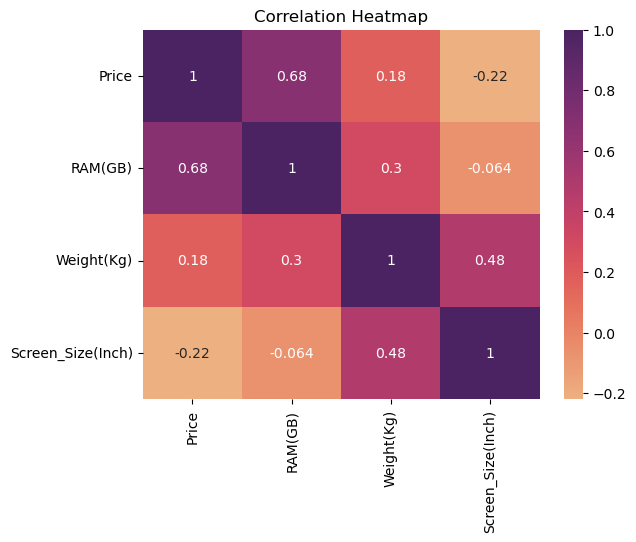

In [1069]:
corr_df = df[["Price", "RAM(GB)", "Weight(Kg)","Screen_Size(Inch)"]].corr()

sns.heatmap(corr_df, annot=True, cmap="flare")
plt.title("Correlation Heatmap")
plt.show()

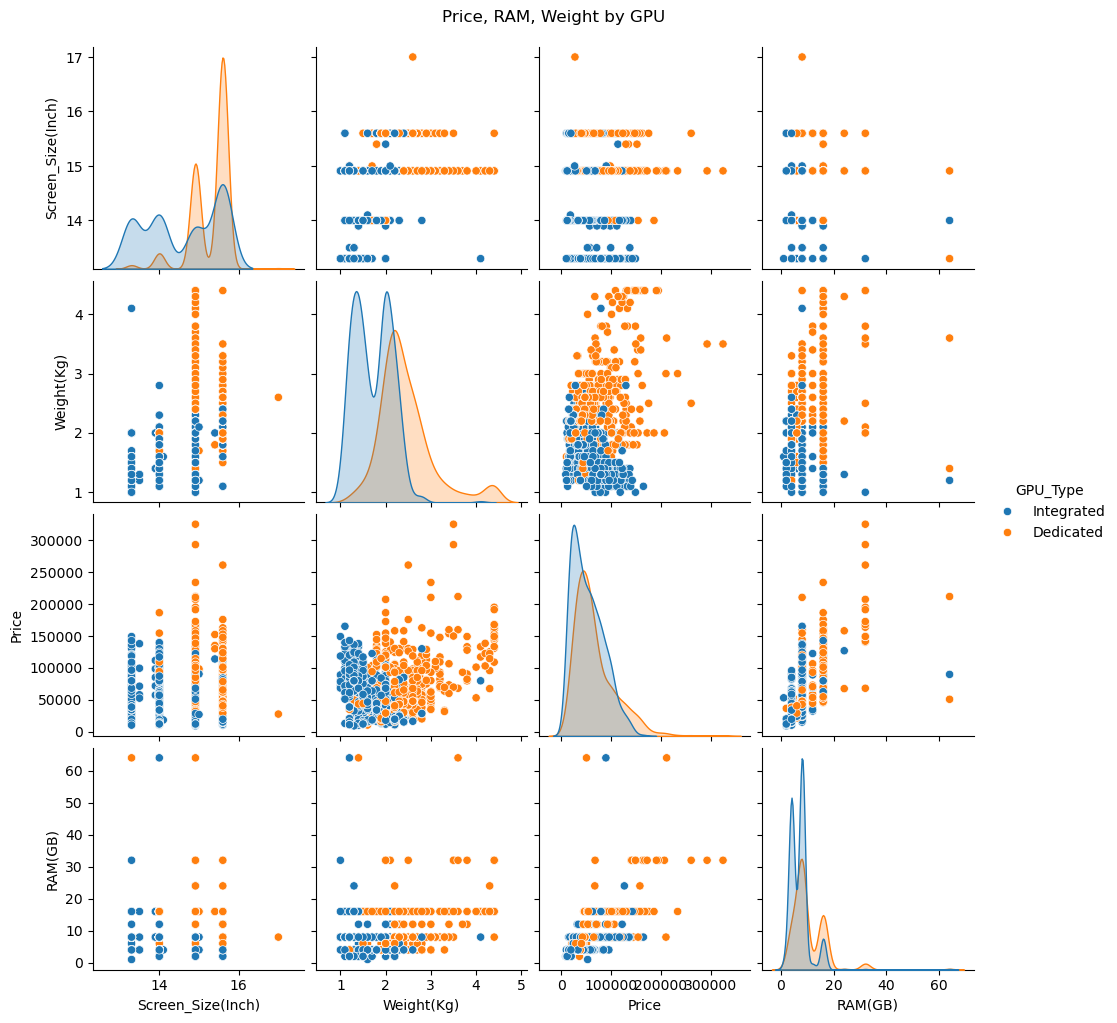

In [1070]:
sns.pairplot(df,hue="GPU_Type")
plt.suptitle("Price, RAM, Weight by GPU", y=1.02)
plt.show()

## VISUALIZATION

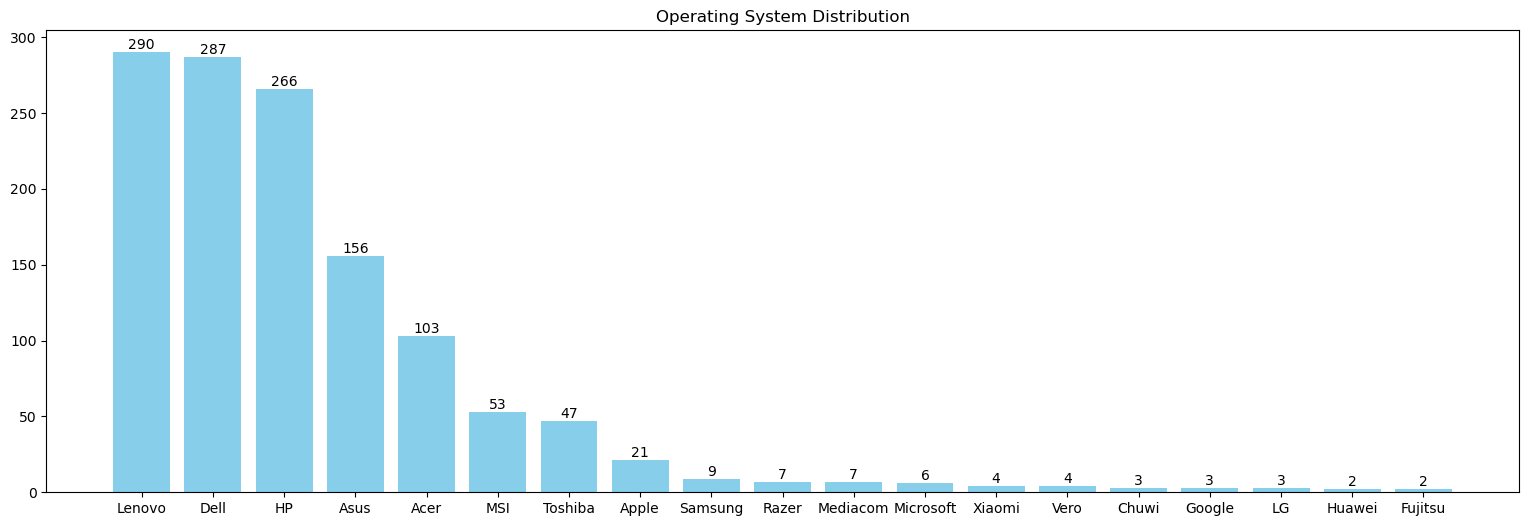

In [1072]:
company_data = df["Company"].value_counts().reset_index()

fig, ax = plt.subplots(figsize=(19,6))
bars = ax.bar(company_data["Company"], company_data["count"], color="skyblue")
ax.bar_label(bars)

plt.title("Operating System Distribution")
plt.show()

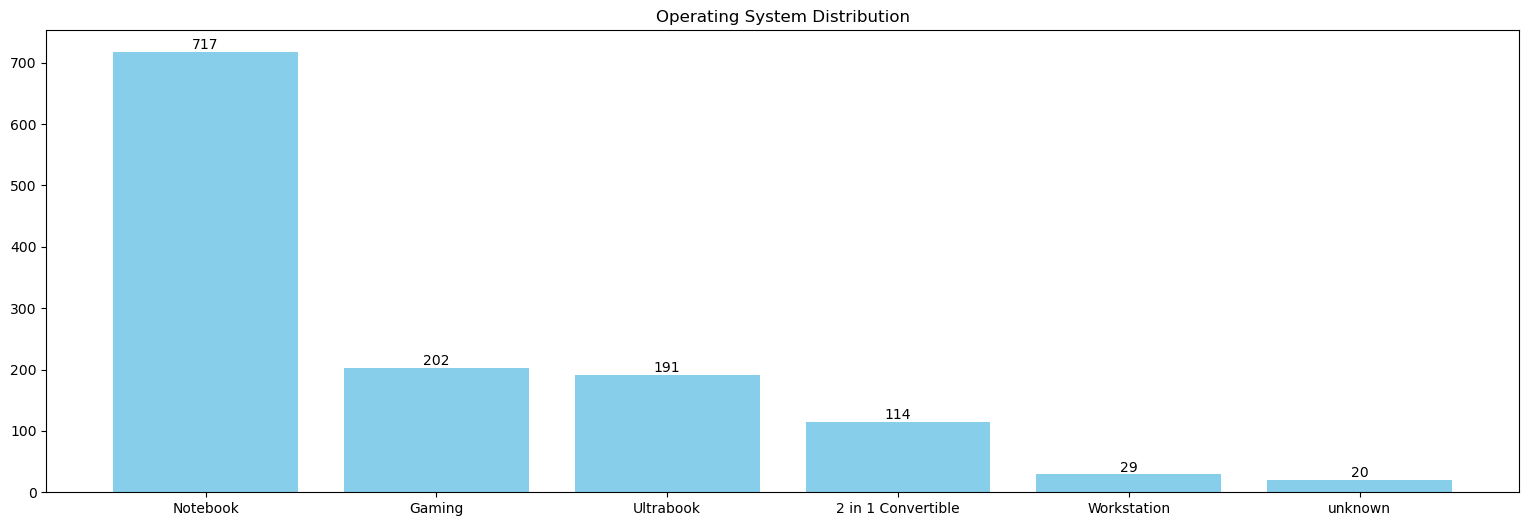

In [1158]:
laptype_data = df["Type_Name"].value_counts().reset_index()

fig, ax = plt.subplots(figsize=(19,6))
bars = ax.bar(laptype_data["Type_Name"], laptype_data["count"], color="skyblue")
ax.bar_label(bars)

plt.title("Operating System Distribution")
plt.show()

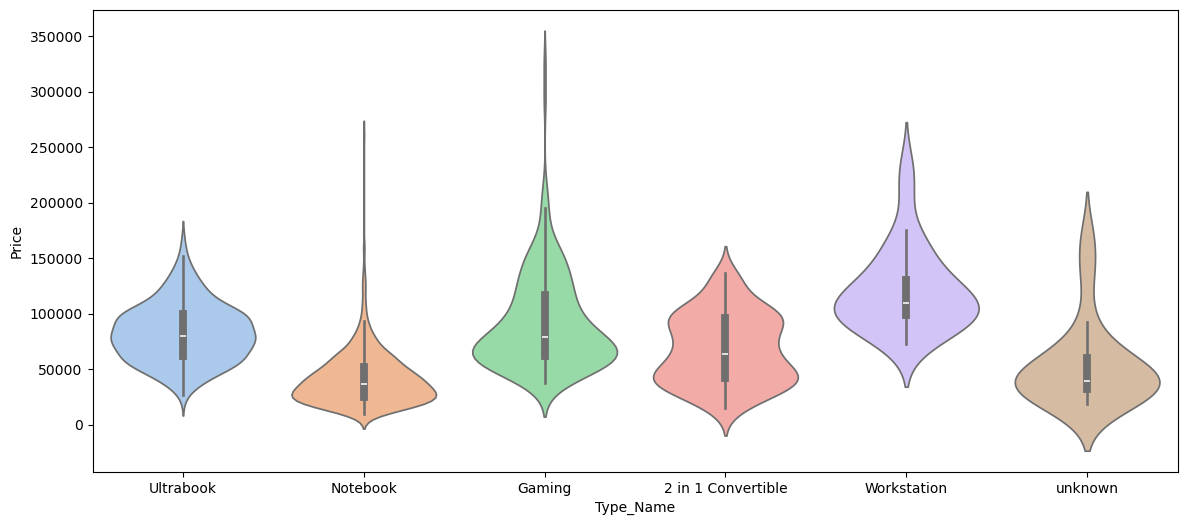

In [1184]:
plt.figure(figsize=(14, 6)) 
sns.violinplot(x="Type_Name",y="Price",data=df,palette="pastel")
plt.show()

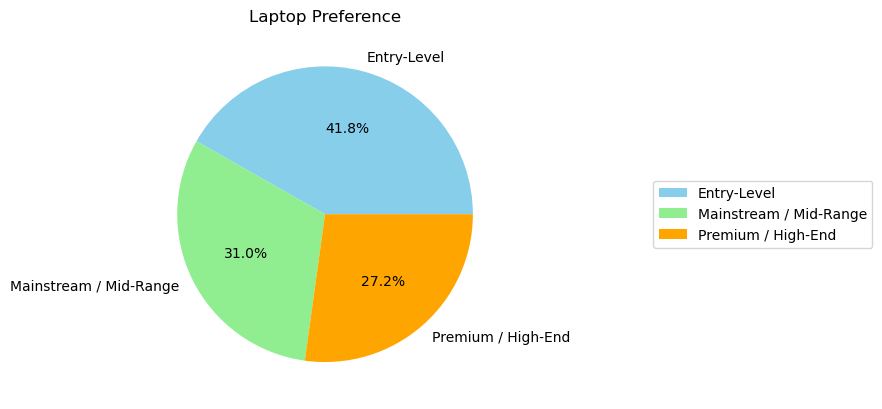

In [1073]:
preference_data = df["Preference"].value_counts().reset_index()

plt.pie(data=preference_data,x="count",labels="Preference",autopct = "%1.1f%%",colors = ['skyblue', 'lightgreen', 'orange'])
plt.legend(loc = "right",bbox_to_anchor = (2,0.5))
plt.title("Laptop Preference")
plt.show()

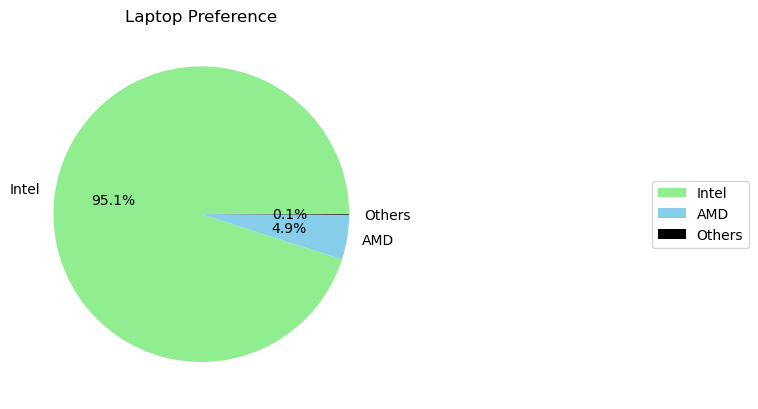

In [1074]:
processor_data = df["Processor_Type"].value_counts().reset_index()

plt.pie(data=processor_data,x="count",labels="Processor_Type",autopct = "%1.1f%%",colors = ['lightgreen', 'skyblue', 'black'])
plt.legend(loc = "right",bbox_to_anchor = (2,0.5))
plt.title("Laptop Preference")
plt.show()

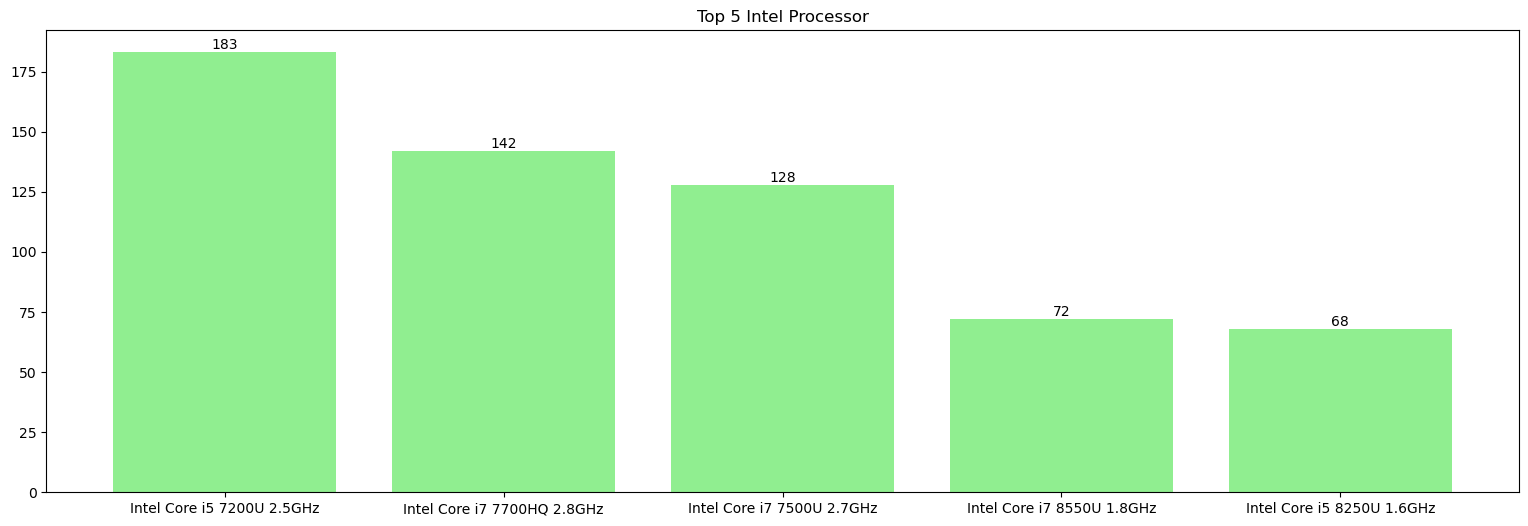

In [1075]:
processor_data = df.query("Processor_Type=='Intel'")["Processor"].value_counts().nlargest(5).reset_index()

fig, ax = plt.subplots(figsize=(19,6))
bars = ax.bar(processor_data["Processor"], processor_data["count"], color="lightgreen")
ax.bar_label(bars)

plt.title("Top 5 Intel Processor")
plt.show()

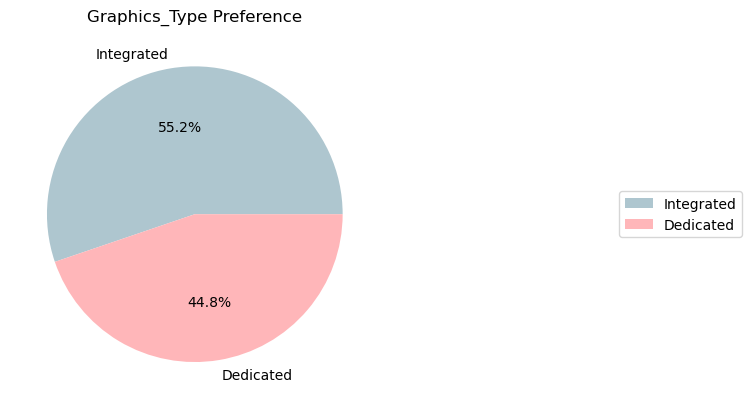

In [1076]:
graphics_data = df["GPU_Type"].value_counts().reset_index()

plt.pie(data=graphics_data,x="count",labels="GPU_Type",autopct = "%1.1f%%",colors = ["#AEC6CF", "#FFB6B9"])
plt.legend(loc = "right",bbox_to_anchor = (2,0.5))
plt.title("Graphics_Type Preference")
plt.show()

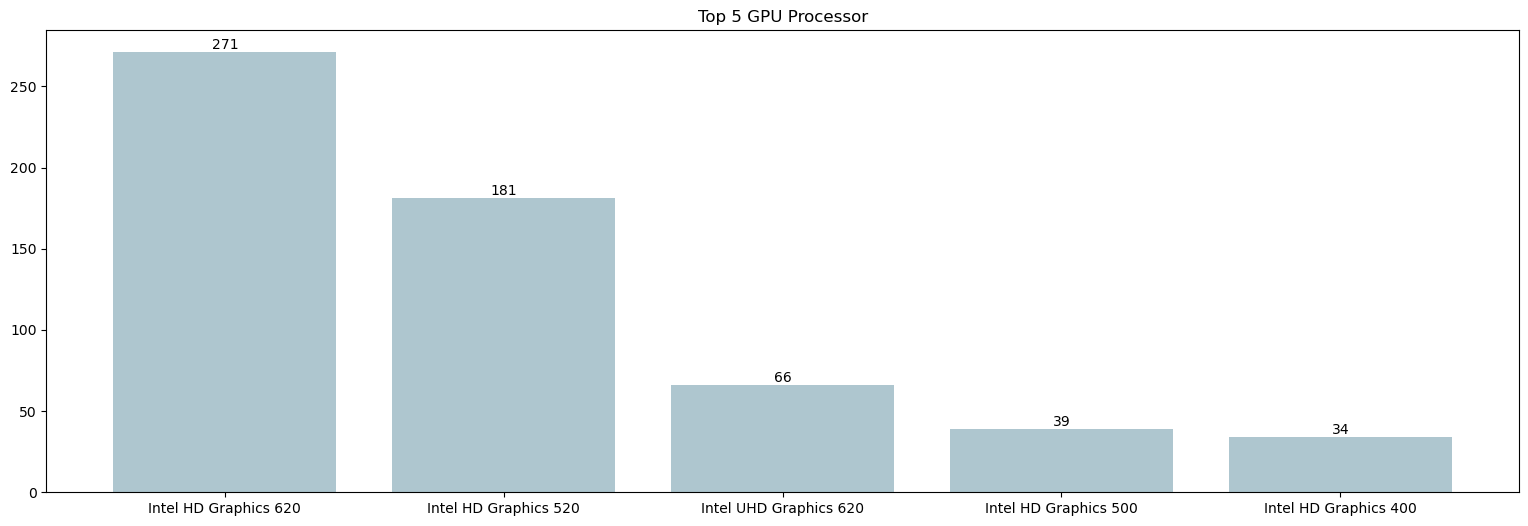

In [1186]:
gpu_integrated_data = df.query("GPU_Type=='Integrated'")["GPU"].value_counts().nlargest(5).reset_index()

fig, ax = plt.subplots(figsize=(19,6))
bars = ax.bar(gpu_integrated_data["GPU"], gpu_integrated_data["count"], color="#AEC6CF")
ax.bar_label(bars)

plt.title("Top 5 GPU Processor")
plt.show()

## STATISTICAL TEST

### INDEPENDENT TTEST

In [1090]:
integrated_data = df.query("GPU_Type=='Integrated'")["Price"]
dedicated_data = df.query("GPU_Type=='Dedicated'")["Price"]
alpha=0.05

In [1091]:
stat_value,p_value = ttest_ind(integrated_data,dedicated_data,equal_var=True)

In [1092]:
if p_value > alpha:
    print("Fail to reject Null Hypothesis: Both groups are same")
else:
    print("Reject Null Hypothesis: Both groups are not same")

Reject Null Hypothesis: Both groups are not same


In [1093]:
stat_value

-6.603907548461839

In [1094]:
p_value

5.87032667468216e-11

- ***T-test*** shows ***significant price difference*** between Integrated and Dedicated GPU laptops

### TWO-WAY ANOVA

In [1096]:
formula = "Price ~ C(Company) + C(RAM) + C(Preference) +  C(OS_Type) + C(Processor_Type) +C(GPU_Type)\
                    + C(Weight_Category)+ C(OS_Type):C(Processor_Type) +  C(Company):C(Processor_Type)"

model = ols(formula, data=df).fit()

anova_table = sm.stats.anova_lm(model, typ=3)

print(anova_table)

                                    sum_sq      df           F         PR(>F)
Intercept                     6.091626e+07     1.0    0.298269   5.850687e-01
C(Company)                    7.459646e+08    18.0    0.202918   8.163726e-01
C(RAM)                        8.238440e+10     9.0   44.820517   6.451408e-70
C(Preference)                 3.737315e+11     2.0  914.964174  2.774990e-244
C(OS_Type)                    1.657699e+08     4.0    0.202918   8.163726e-01
C(Processor_Type)             8.288495e+07     2.0    0.202918   8.163726e-01
C(GPU_Type)                   3.634086e+09     1.0   17.793837   2.642059e-05
C(Weight_Category)            1.710281e+09     2.0    4.187086   1.540721e-02
C(OS_Type):C(Processor_Type)  3.324682e+08     8.0    0.203486   8.159091e-01
C(Company):C(Processor_Type)  1.491929e+09    36.0    0.202918   8.163726e-01
Residual                      2.516149e+11  1232.0         NaN            NaN


- ***RAM*** and User ***Preference*** have a strong, ***statistically significant*** impact on laptop price.

- ***GPU_Type*** and ***Weight*** Category also show ***significant effects***, indicating performance and portability influence pricing.

- ***Company***, ***OS_Type***, and ***Processor_Type*** have ***no significant effect*** on price when other specs are considered.

- ***Interaction effects*** (e.g., OS × Processor, Company × Processor) are ***not significant***, suggesting these combinations do not jointly influence pricing.

## INSIGHTS

- The Price feature is a significant factor and shows positive skewness. Most laptops are priced around ₹52,000, falling within the mid-range segment. About 99% of prices fall below ₹167,785.

- The maximum laptop price is ₹324,954, which is not considered an outlier as it includes a dedicated GPU, indicating it’s a gaming laptop, thereby justifying the high price.

- The Screen Size has a median of 14.91 inches with no outliers detected, meaning 50% of the screen sizes lie close to this value, showing a consistent trend in laptop displays.

- The RAM configuration shows that 8GB is the most common with 608 laptops, followed by 4GB RAM at 362 units, highlighting a user preference for performance within budget.

- When comparing Price vs RAM, Processor Type, and GPU Type, although some points appear as outliers, they are mostly high-end laptops with dedicated GPUs, commonly gaming models, which justifies the elevated prices.

- By Weight category, moderate-weight laptops (≤ 3.5kg) are the most preferred, offering a balance between portability and performance.

***In the correlation analysis:***

* Price is strongly correlated with RAM, likely due to the influence of high-tech processors.

* There’s a moderate correlation with Weight.

* Negligible correlation is observed with Screen Size, indicating it doesn’t heavily impact pricing.

- Lenovo (290 units) and Dell (287 units) are the top-selling brands, likely due to their wide range of offerings and availability.

- Lenovo dominates the entry-level segment, making it more attractive for budget-conscious buyers.

- Notebook-type laptops are the most popular, with 717 units, far ahead of Gaming laptops at 202 units.

- Specifically, Lenovo contributes 174 Notebook-type laptops, reinforcing its budget-friendly branding.

***In market segmentation:***

* Entry-level laptops account for 41.8% of sales,

* Followed by Mainstream/Mid-range at 31%, and

* Premium/High-end at 27.2%.

This clearly shows a strong price sensitivity among users.

***For Processor Type:***

* Intel dominates with a 95.1% market share, likely due to its better perceived performance.

* Among Intel models, Intel Core i5 U GHz is the most selected, with 183 units.

***For GPU Type:***

* Integrated GPUs are preferred due to affordability and basic usage needs.

* The most common GPU is Intel HD Graphics 620, present in 271 laptops.

- An Independent T-test on GPU Type vs Price reveals a statistically significant price difference between Integrated and Dedicated GPUs, leading to rejection of the null hypothesis.